In [213]:
import pandas as pd
import numpy as np 

In [214]:
# df = pd.read_csv(r"E:\email_spam\spam.csv",encoding='your_encoding')

In [215]:
file_path = r"E:\email_spam\spam.csv"


In [216]:
import chardet

In [217]:

# Detect the encoding of the file
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

# Read the CSV file with the detected encoding
df = pd.read_csv(file_path, encoding=encoding)

In [218]:
df.head(1)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [220]:
# drop last 3 col
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [221]:
df.head(1)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."


In [222]:
df.rename(columns={"v1" : "Target","v2" : "Text"},inplace=True)

In [223]:
df.sample(5)

,Target,Text
3646,ham,"Hey babe, my friend had to cancel, still up fo..."
1966,ham,What's a feathery bowa? Is that something guys...
2632,ham,I WILL CAL YOU SIR. In meeting
5121,ham,"Oops I did have it, &lt;#&gt; ?"
2226,ham,If you have belive me. Come to my home.


In [224]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [225]:
df["Target"]=encoder.fit_transform(df["Target"])

In [226]:
df.head(5)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [227]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [228]:
df.duplicated().sum()

403

In [229]:
df=df.drop_duplicates(keep="first")

In [230]:
df.duplicated().sum()

0

In [231]:
df.shape

(5169, 2)

2 EDA

In [232]:
df["Target"].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

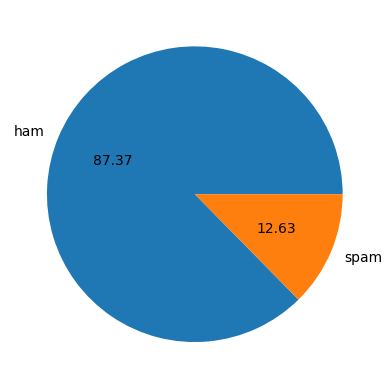

In [233]:
import matplotlib.pyplot as plt 
plt.pie(df["Target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [234]:
# Data is inbalanced

In [235]:
import nltk
nltk.download("punkit")

[nltk_data] Error loading punkit: Package 'punkit' not found in index


False

In [236]:
df["num_character"]=df["Text"].apply(len)

In [237]:
df["num_word"]=df["Text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [238]:
df.head(1)

,Target,Text,num_character,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24


In [239]:
df["num_sent"]=df["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [240]:
df.head(1)

,Target,Text,num_character,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2


In [241]:
df[["num_word","num_sent","num_character"]].describe()

,num_word,num_sent,num_character
count,5169.000000,5169.000000,5169.000000
mean,18.455794,1.965564,78.977945
std,13.324758,1.448541,58.236293
min,1.000000,1.000000,2.000000
25%,9.000000,1.000000,36.000000
50%,15.000000,1.000000,60.000000
75%,26.000000,2.000000,117.000000
max,220.000000,38.000000,910.000000


In [242]:
df[df["Target"]==0][["num_word","num_sent","num_character"]].describe()

,num_word,num_sent,num_character
count,4516.000000,4516.000000,4516.000000
mean,17.123782,1.820195,70.459256
std,13.493970,1.383657,56.358207
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,34.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,90.000000
max,220.000000,38.000000,910.000000


In [243]:
df[df["Target"]==1][["num_word","num_sent","num_character"]].describe()

,num_word,num_sent,num_character
count,653.000000,653.000000,653.000000
mean,27.667688,2.970904,137.891271
std,7.008418,1.488425,30.137753
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.000000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,9.000000,224.000000


In [244]:
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

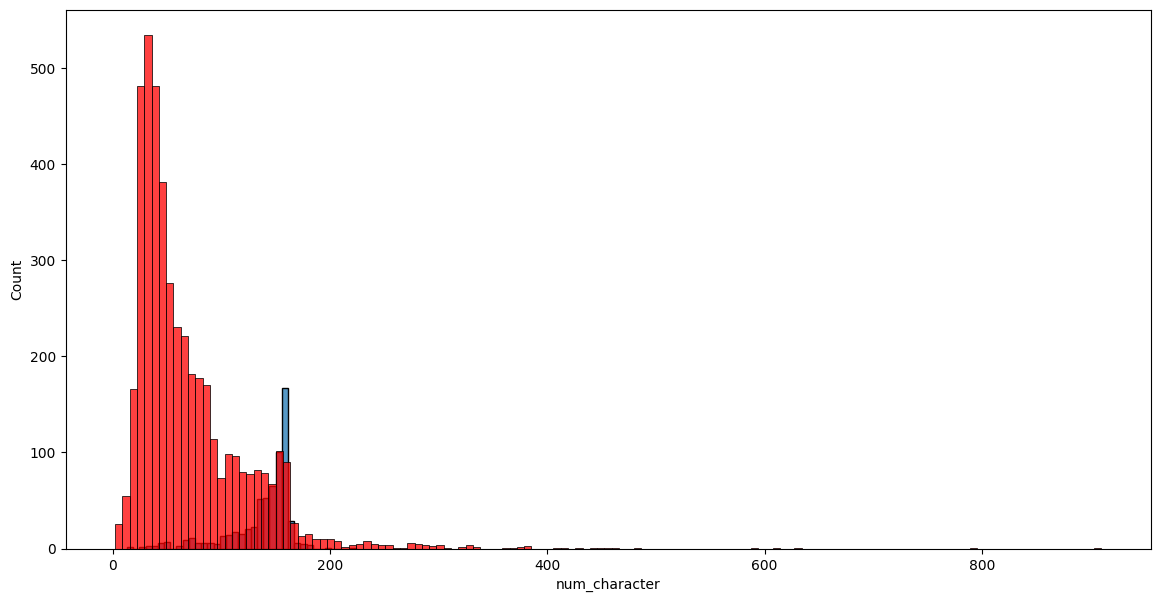

In [245]:
plt.figure(figsize=(14,7))
sns.histplot(df[df["Target"]==1]["num_character"])
sns.histplot(df[df["Target"]==0]["num_character"],color="red")

3 .Data Preprocessing
*Lower Case
*Tokenization
*Removing special Characters
*Removing stop words and puncation
*stemming

In [246]:
import nltk
from nltk import word_tokenize

In [247]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [248]:
def transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)

In [249]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [250]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [251]:
transform("i love the video lecture on machine learnini")

'love video lectur machin learnini'

In [252]:
df["Text"].apply(transform)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Text, Length: 5169, dtype: object

In [253]:
df["transformed"]=df["Text"].apply(transform)

In [254]:
df.head(1)

,Target,Text,num_character,num_word,num_sent,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...


In [255]:
spam_corpus=[]   

for msg in df[df["Target"]==1]["transformed"].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [256]:
len(spam_corpus)

9939

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

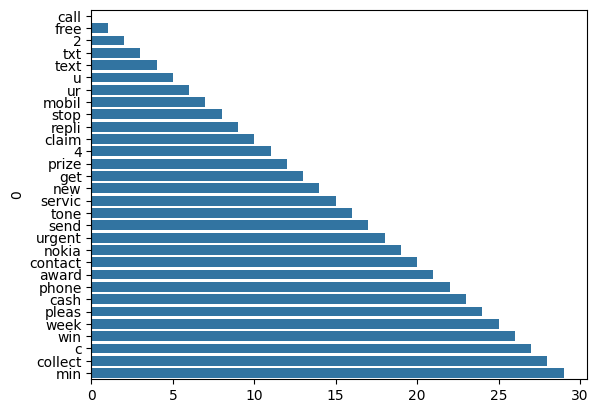

In [257]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation="horizontal")

In [258]:
good_words=[]
for msg in df[df["Target"]==0]["transformed"].tolist():
    for words in msg.split():
        good_words.append(words)

In [259]:
len(good_words)

35404

In [260]:
from collections import Counter
Counter(good_words).most_common(50)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129),
 ('say', 127),
 ('back', 127),
 ('today', 123),
 ('hope', 122),
 ('ask', 121),
 ('sorri', 121),
 ('n', 120),
 ('send', 120),
 ('r', 120),
 ('work', 118),
 ('dont', 118),
 ('meet', 112),
 ('hi', 111),
 ('well', 109),
 ('thing', 109),
 ('wat', 108),
 ('k', 107),
 ('much', 107),
 ('night', 107),
 ('oh', 106)]

In [261]:
from wordcloud import WordCloud
wc=WordCloud(width=50,height=50,min_font_size=10,background_color="white")

In [262]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [263]:
spam_wc=wc.generate(df[df["Target"]==1]["transformed"].str.cat(sep=""))

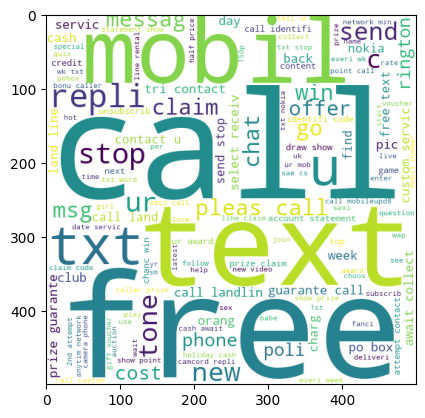

In [264]:
plt.imshow(spam_wc)

model bilding

In [265]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [266]:
x =cv.fit_transform(df["transformed"]).toarray()

In [267]:
x.shape

(5169, 6708)

In [268]:
y=df["Target"].values

In [269]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=2)

In [272]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [273]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [274]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [275]:
bnb.fit(X_train,y_train)
y_pred2=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [276]:
mnb.fit(X_train,y_train)
y_pred3=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


now using Tf-idf

In [277]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [278]:
tfidf=TfidfVectorizer()

In [279]:
X=tfidf.fit_transform(df["transformed"]).toarray()

In [280]:
X.shape

(5169, 6708)

In [281]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=2)

In [282]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [283]:
bnb.fit(X_train,y_train)
y_pred2=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [284]:
mnb.fit(X_train,y_train)
y_pred3=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier


In [296]:
svc=SVC(kernel="sigmoid",gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver="liblinear")
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)


In [303]:
clfs={
    "SVC":svc,
    "KN":knc,
    "NB":mnb,
    "DT":dtc,
    "LR":lrc,
    "RF":rfc,
    
}

In [304]:
def Train_classifer(clfs,X_train,y_train,X_test,y_test):
    clfs.fit(X_train,y_train)
    y_pred=clfs.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [305]:
Train_classifer(knc,X_train,y_train,X_test,y_test)

(0.9003868471953579, 1.0)

In [294]:
Train_classifer(rfc,X_train,y_train,X_test,y_test)

(0.971953578336557, 1.0)

In [299]:
Train_classifer(lrc,X_train,y_train,X_test,y_test)

(0.9477756286266924, 0.9883720930232558)

In [306]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = Train_classifer(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9477756286266924
Precision -  0.9883720930232558
For  RF
Accuracy -  0.971953578336557
Precision -  1.0


In [307]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values("Precision",ascending=False)

In [308]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
4,LR,0.947776,0.988372
0,SVC,0.972921,0.974138
3,DT,0.935203,0.838095


In [ ]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(rfc,open("model.pkl","wb"))